In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
%matplotlib inline

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_237af5a5b5b840bd85d074b7b4b98f94 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4JpAfgxDdgH0JT7rklUoudr2_NSNtdLvcL0Kh9kLeRLZ',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_237af5a5b5b840bd85d074b7b4b98f94.get_object(Bucket='dscapstonechicagohome2-donotdelete-pr-3wdn5jn6njbrh5',Key='CSF3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

CSF3 = pd.read_csv(body)
CSF3.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Property,Address,Latitude,Longitude,Price $K,NaN
3,NaN,0,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00",NaN
4,NaN,1,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00",NaN


In [2]:
# Drop columns and rows that are not necessary 
CSF3.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 6'], axis=1, inplace=True)
CSF3.drop([0,1], axis=0, inplace=True)
CSF3.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,Address,Latitude,Longitude,Price $K
3,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00"
4,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00"
5,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,"$6,800.00"
6,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,"$5,499.00"


In [3]:
new_header = CSF3.iloc[0] #grab the first row for the header
Chgo = CSF3[1:] #take the data less the header row and rename Chgo
Chgo.columns = new_header #set the header row as the dataframe header Chgo.head()
Chgo

2,Address,Latitude,Longitude,Price $K
3,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00"
4,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00"
5,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,"$6,800.00"
6,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,"$5,499.00"
7,"1425 N State Pkwy, Chicago, IL 60610",41.908340,-87.628670,"$5,950.00"
8,"1241 N State Pkwy, Chicago, IL 60610",41.905170,-87.628340,"$6,495.00"
9,"1912 N Orchard St, Chicago, IL 60614",41.916450,-87.646300,"$5,600.00"
10,"1431 N State Pkwy, Chicago, IL 60610",41.908410,-87.628670,"$5,100.00"
11,"1911 N Burling St, Chicago, IL 60614",41.916920,-87.647300,"$5,000.00"
12,"25 E Cedar St, Chicago, IL 60611",41.902290,-87.626930,"$5,999.00"


In [4]:
Chgo.dtypes

2
Address      object
Latitude     object
Longitude    object
Price $K     object
dtype: object

In [5]:
Chgo.reset_index(drop=True, inplace=True) 
Chgo.head()

2,Address,Latitude,Longitude,Price $K
0,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,"$6,000.00"
1,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,"$5,950.00"
2,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,"$6,800.00"
3,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,"$5,499.00"
4,"1425 N State Pkwy, Chicago, IL 60610",41.908340,-87.628670,"$5,950.00"


In [6]:
def clean_currency(x):
    """ 
    If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted 
    """
    if isinstance(x, str): return(x.replace('$', '').replace(',', '')) 
    return(x)

Chgo['Price $K'] = Chgo['Price $K'].apply(clean_currency).astype('float')
Chgo

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2,Address,Latitude,Longitude,Price $K
0,"1516 N Lake Shore Dr, Chicago, IL 60610",41.910000,-87.626340,6000.0
1,"1919 N Dayton St, Chicago, IL 60614",41.916620,-87.649520,5950.0
2,"1421 N Astor St, Chicago, IL 60610",41.908310,-87.627430,6800.0
3,"1433 N State Pkwy, Chicago, IL 60610",41.908430,-87.628670,5499.0
4,"1425 N State Pkwy, Chicago, IL 60610",41.908340,-87.628670,5950.0
5,"1241 N State Pkwy, Chicago, IL 60610",41.905170,-87.628340,6495.0
6,"1912 N Orchard St, Chicago, IL 60614",41.916450,-87.646300,5600.0
7,"1431 N State Pkwy, Chicago, IL 60610",41.908410,-87.628670,5100.0
8,"1911 N Burling St, Chicago, IL 60614",41.916920,-87.647300,5000.0
9,"25 E Cedar St, Chicago, IL 60611",41.902290,-87.626930,5999.0


In [7]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # Folium is a Python library that helps create a few types of interactive maps.
from folium.plugins import MarkerCluster

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [8]:
# Display map of Chicago and mark where these homes are located

Chgo_map = folium.Map(location=[41.8842, -87.6324], tiles = "Stamen Terrain", zoom_start=15)
# Uses latitude/longitude. Higher zoom number = closer in you get.

folium.Marker([41.881939, -87.627937], 
              popup='LOOP',
              icon=folium.Icon(color='orange') 
             ).add_to(Chgo_map)

folium.Marker([41.910000, -87.626340], 
              popup='1516 N Lake Shore Dr, $6MM',
              icon=folium.Icon(color='green', icon='cloud') 
             ).add_to(Chgo_map)

folium.Marker([41.916620, -87.649520], 
              popup='1919 N Dayton, $5.95M',
              icon=folium.Icon(color='lightred',icon='cloud', prefix='fa')
             ).add_to(Chgo_map)

folium.Marker([41.908310 ,-87.627430], 
            popup='1421 N Astor, $6.8M',
                icon=folium.Icon(color='blue',icon='cloud', prefix='fa')
            ).add_to(Chgo_map)

folium.Marker([41.908430, -87.628670], 
              popup='1433 N State, $5.499M',
              icon=folium.Icon(color='yellow',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)
              
folium.Marker([41.908340, -87.628670], 
              popup='1425 N State, $5.95M',
            icon=folium.Icon(color='purple',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)
              
folium.Marker([41.905170, -87.628340], 
              popup='1241 N State, $6.495M',
              icon=folium.Icon(color='lightgray',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.916450, -87.646300], 
              popup='1912 N Orchard, $5.6M',
              icon=folium.Icon(color='pink',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.908410, -87.628670], 
              popup='1431 N State, $5.1M',
            icon=folium.Icon(color='beige',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.916920, -87.647300],
              popup='1911 N Burling, $5M',
              icon=folium.Icon(color='black',icon='cloud', prefix='fa') 
             ).add_to(Chgo_map)

folium.Marker([41.902290, -87.626930], 
              popup='25 E Cedar, $5.999M',
              icon=folium.Icon(color='lightblue',icon='cloud', prefix='fa')
             ).add_to(Chgo_map)

folium.Marker([41.905410, -87.627520], 
              popup='1246 N Astor, $6.999M',
              icon=folium.Icon(color='lightgreen',icon='cloud', prefix= 'fa')
             ).add_to(Chgo_map)

Chgo_map # calls map of Chicago to display

In [9]:
import requests # library to handle requests
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


In [10]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00' # your Foursquare ID from account
CLIENT_SECRET = 'NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR' # your Foursquare Secret from account
VERSION = '20200113' #'20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00
CLIENT_SECRET:NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR


In [11]:
address = '1912 N. Orchard Street, Chicago, IL' #Let's say we are at Citibank, Lincoln Park and get its lat/lon 
#41.918377, -87.648264

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.91645395 -87.64635147291955


In [40]:
search_query = 'School' # search for Store, Bar, Restaurant, School
radius = 1500
print(search_query + ' .... OK!')

School .... OK!


In [41]:
#Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VXOCST0MCZ0U5SSIRPJRIO1MM24RLD0DZNRZ50TV4QWQ1I00&client_secret=NDQFQ3HLBDKBEY0PARLGPXRX5KY1J2JQKFVCHJZOHSLCQFDR&ll=41.91645395,-87.64635147291955&v=20200113&query=School&radius=1500&limit=30'

In [42]:
#Send the GET Request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e1cb032216785001b56b863'},
 'response': {'venues': [{'id': '4acd2795f964a52017cb20e3',
    'name': 'Old Town School of Folk Music',
    'location': {'address': '4544 N Lincoln Ave',
     'crossStreet': 'Wilson',
     'lat': 41.91809125741104,
     'lng': -87.65144855897087,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.91809125741104,
       'lng': -87.65144855897087}],
     'distance': 459,
     'postalCode': '60614',
     'cc': 'US',
     'city': 'Chicago',
     'state': 'IL',
     'country': 'United States',
     'formattedAddress': ['4544 N Lincoln Ave (Wilson)',
      'Chicago, IL 60614',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f2931735',
      'name': 'Performing Arts Venue',
      'pluralName': 'Performing Arts Venues',
      'shortName': 'Performing Arts',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_',
       'suffix': '.png'},
      'primary'

In [43]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1f2931735', 'name': 'P...",False,4acd2795f964a52017cb20e3,4544 N Lincoln Ave,US,Chicago,United States,Wilson,459,"[4544 N Lincoln Ave (Wilson), Chicago, IL 6061...","[{'label': 'display', 'lat': 41.91809125741104...",41.918091,-87.651449,NaN,60614,IL,Old Town School of Folk Music,v-1578938426
1,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4b1bd015f964a520a2fd23e3,330 W Webster Ave,US,Chicago,United States,NaN,962,"[330 W Webster Ave, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.92284239104967...",41.922842,-87.638516,Lincoln Park,60614,IL,Francis W. Parker School,v-1578938426
2,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4c90fbd97088a143f419ad43,59 W North Blvd,US,Chicago,United States,NaN,1437,"[59 W North Blvd, Chicago, IL 60610, United St...","[{'label': 'display', 'lat': 41.91059677372507...",41.910597,-87.630881,NaN,60610,IL,Latin School of Chicago,v-1578938426
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4b829b46f964a52079da30e3,2109 North Fremont St.,US,Chicago,United States,Dickens,538,"[2109 North Fremont St. (Dickens), Chicago, IL...","[{'label': 'display', 'lat': 41.92007266945801...",41.920073,-87.650666,NaN,60614,IL,St. James School,v-1578938426
4,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4b68c31df964a5208d8b2be3,2001 N Orchard St,US,Chicago,United States,Armitage,257,"[2001 N Orchard St (Armitage), Chicago, IL 606...","[{'label': 'display', 'lat': 41.91862400974852...",41.918624,-87.647427,NaN,60614,IL,Lincoln Park High School,v-1578938426
5,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",False,4c1ece91b306c9287aaa67b7,2442 N Lincoln Ave Fl 2,US,Chicago,United States,NaN,1142,"[2442 N Lincoln Ave Fl 2, Chicago, IL 60614, U...","[{'label': 'display', 'lat': 41.92628583710019...",41.926286,-87.650324,NaN,60614,IL,Chicago School of Hot Yoga,v-1578938426
6,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",False,4d8ba29ba851a0901a25e21b,122 S Michigan Ave,US,Chicago,United States,Suite 1070,1542,"[122 S Michigan Ave (Suite 1070), Chicago, IL ...","[{'label': 'display', 'lat': 41.9046924208071,...",41.904692,-87.636517,NaN,60603,IL,Graduate School USA,v-1578938426
7,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,52aa4d39498e8b85b2b5c5c9,615 W Kemper Pl,US,Chicago,United States,NaN,918,"[615 W Kemper Pl, Chicago, IL 60614, United St...","[{'label': 'display', 'lat': 41.92458168535752...",41.924582,-87.644459,NaN,60614,IL,Abraham Lincoln Elementary School,v-1578938426
8,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,57bdff7d498e904481210f8f,1855 N Sheffield Ave,US,Chicago,United States,NaN,554,"[1855 N Sheffield Ave, Chicago, IL 60614, Unit...","[{'label': 'display', 'lat': 41.915367, 'lng':...",41.915367,-87.652890,NaN,60614,IL,Mulligan School,v-1578938426
9,"[{'id': '4bf58dd8d48988d1ab941735', 'name': 'S...",False,4d63ae38a5be236a5342c4db,2021 N Burling St,US,Chicago,United States,NaN,208,"[2021 N Burling St, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.91832488627687...",41.918325,-87.646458,NaN,60614,IL,Lincoln Park Annex School,v-1578938426


In [44]:
#Define information of interest and filter dataframe

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered 

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Old Town School of Folk Music,Performing Arts Venue,4544 N Lincoln Ave,US,Chicago,United States,Wilson,459,"[4544 N Lincoln Ave (Wilson), Chicago, IL 6061...","[{'label': 'display', 'lat': 41.91809125741104...",41.918091,-87.651449,NaN,60614,IL,4acd2795f964a52017cb20e3
1,Francis W. Parker School,High School,330 W Webster Ave,US,Chicago,United States,NaN,962,"[330 W Webster Ave, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.92284239104967...",41.922842,-87.638516,Lincoln Park,60614,IL,4b1bd015f964a520a2fd23e3
2,Latin School of Chicago,High School,59 W North Blvd,US,Chicago,United States,NaN,1437,"[59 W North Blvd, Chicago, IL 60610, United St...","[{'label': 'display', 'lat': 41.91059677372507...",41.910597,-87.630881,NaN,60610,IL,4c90fbd97088a143f419ad43
3,St. James School,School,2109 North Fremont St.,US,Chicago,United States,Dickens,538,"[2109 North Fremont St. (Dickens), Chicago, IL...","[{'label': 'display', 'lat': 41.92007266945801...",41.920073,-87.650666,NaN,60614,IL,4b829b46f964a52079da30e3
4,Lincoln Park High School,High School,2001 N Orchard St,US,Chicago,United States,Armitage,257,"[2001 N Orchard St (Armitage), Chicago, IL 606...","[{'label': 'display', 'lat': 41.91862400974852...",41.918624,-87.647427,NaN,60614,IL,4b68c31df964a5208d8b2be3
5,Chicago School of Hot Yoga,Yoga Studio,2442 N Lincoln Ave Fl 2,US,Chicago,United States,NaN,1142,"[2442 N Lincoln Ave Fl 2, Chicago, IL 60614, U...","[{'label': 'display', 'lat': 41.92628583710019...",41.926286,-87.650324,NaN,60614,IL,4c1ece91b306c9287aaa67b7
6,Graduate School USA,General College & University,122 S Michigan Ave,US,Chicago,United States,Suite 1070,1542,"[122 S Michigan Ave (Suite 1070), Chicago, IL ...","[{'label': 'display', 'lat': 41.9046924208071,...",41.904692,-87.636517,NaN,60603,IL,4d8ba29ba851a0901a25e21b
7,Abraham Lincoln Elementary School,Elementary School,615 W Kemper Pl,US,Chicago,United States,NaN,918,"[615 W Kemper Pl, Chicago, IL 60614, United St...","[{'label': 'display', 'lat': 41.92458168535752...",41.924582,-87.644459,NaN,60614,IL,52aa4d39498e8b85b2b5c5c9
8,Mulligan School,Elementary School,1855 N Sheffield Ave,US,Chicago,United States,NaN,554,"[1855 N Sheffield Ave, Chicago, IL 60614, Unit...","[{'label': 'display', 'lat': 41.915367, 'lng':...",41.915367,-87.652890,NaN,60614,IL,57bdff7d498e904481210f8f
9,Lincoln Park Annex School,Student Center,2021 N Burling St,US,Chicago,United States,NaN,208,"[2021 N Burling St, Chicago, IL 60614, United ...","[{'label': 'display', 'lat': 41.91832488627687...",41.918325,-87.646458,NaN,60614,IL,4d63ae38a5be236a5342c4db


In [46]:
dataframe_filtered.name

0                      Old Town School of Folk Music
1                           Francis W. Parker School
2                            Latin School of Chicago
3                                   St. James School
4                           Lincoln Park High School
5                         Chicago School of Hot Yoga
6                                Graduate School USA
7                  Abraham Lincoln Elementary School
8                                    Mulligan School
9                          Lincoln Park Annex School
10                     The British School Of Chicago
11                  Oscar Mayer School- Club Bulldog
12                      School House Pub. and Eatery
13                         St. Vincent DePaul School
14                         School Of Music Courtyard
15                  Lincoln Park School Of Fine Arts
16                            Bauler School For Boys
17                                   School Bus Stop
18    DePaul University School of Music Recita

In [47]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the CITIBANK, LINCOLN PARK

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='CITIBANK',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the VENUES as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [34]:
#HOUSE INVENTORY
body = client_237af5a5b5b840bd85d074b7b4b98f94.get_object(Bucket='dscapstonechicagohome2-donotdelete-pr-3wdn5jn6njbrh5',Key='ZillowMedianAgeOfInventory_NSA_AllHomes_Metro.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Invty = pd.read_csv(body) # Source: Zillow
print(Invty.shape)
Invty.head()

(892, 88)


,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03,2013-04,2013-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,0,102001,United States,Country,NaN,109.0,100.0,86.0,76.0,74.0,...,92.0,74.0,63.0,60.0,62.0,64.0,69.0,72.0,75,78
1,1,394913,"New York, NY",Msa,NY,126.0,120.0,90.0,74.0,71.0,...,92.0,66.0,58.0,57.0,64.0,72.0,80.0,84.0,83,84
2,2,753899,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,68.0,34.0,38.0,38.0,37.0,...,58.0,48.0,46.0,47.0,48.0,53.0,56.0,57.0,61,62
3,3,394463,"Chicago, IL",Msa,IL,119.0,110.0,86.0,70.0,69.0,...,94.0,59.0,48.0,51.0,60.0,64.0,71.0,76.0,79,88
4,4,394514,"Dallas-Fort Worth, TX",Msa,TX,89.0,73.0,56.0,53.0,53.0,...,58.0,48.0,44.0,46.0,48.0,49.0,55.0,58.0,61,62


In [35]:
# Since home purchase is very local, let's reduce the data to IL and then to Chicago
IL_invty = Invty.loc[Invty['StateName'] == 'IL'] 
print(IL_invty.shape)
IL_invty.head()

(28, 88)


,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03,2013-04,2013-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
3,3,394463,"Chicago, IL",Msa,IL,119.0,110.0,86.0,70.0,69.0,...,94.0,59.0,48.0,51.0,60.0,64.0,71.0,76.0,79,88
132,132,394520,"Davenport, IL",Msa,IL,105.0,104.0,96.0,76.0,71.0,...,86.0,65.0,51.0,48.0,48.0,47.0,49.0,52.0,57,66
133,133,394972,"Peoria, IL",Msa,IL,101.0,99.0,96.0,83.0,78.0,...,117.0,103.0,80.0,69.0,64.0,70.0,71.0,76.0,82,89
144,144,395033,"Rockford, IL",Msa,IL,109.0,114.0,116.0,92.0,77.0,...,91.0,80.0,57.0,46.0,44.0,47.0,48.0,50.0,56,63
186,186,394454,"Champaign-Urbana, IL",Msa,IL,141.0,134.0,116.0,99.0,83.0,...,119.0,115.0,77.0,66.0,68.0,71.0,74.0,79.0,92,105


In [55]:
Chgo_invty = IL_invty.loc[IL_invty['RegionName'] == 'Chicago, IL'] 
Chgo_invty

# Chicago median age of housing inventory was 88 days in Nov 2019 per Zillow

,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03,2013-04,2013-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
3,3,394463,"Chicago, IL",Msa,IL,119.0,110.0,86.0,70.0,69.0,...,94.0,59.0,48.0,51.0,60.0,64.0,71.0,76.0,79,88


In [59]:
ChgoInvty=Chgo_invty.transpose()
ChgoInvty

,3
SizeRank,3
RegionID,394463
RegionName,"Chicago, IL"
RegionType,Msa
StateName,IL
2013-01,119
2013-02,110
2013-03,86
2013-04,70
2013-05,69


Text(0, 0.5, 'Days')

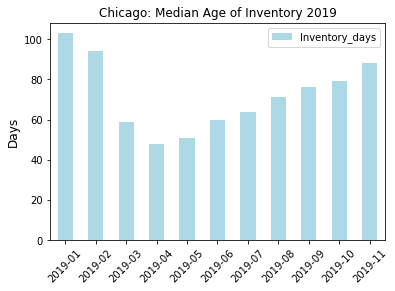

In [92]:
index = ('2019-01', '2019-02', '2019-03', '2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10', '2019-11')
Inventory_days = (103, 94, 59, 48, 51, 60, 64, 71, 76, 79, 88)
df = pd.DataFrame({'Inventory_days': Inventory_days}, index=index)
ax = df.plot(kind='bar', color= 'lightblue', rot=45)
ax.set_title("Chicago: Median Age of Inventory 2019", fontsize=12)
ax.set_ylabel("Days", fontsize=12)

In [93]:

body = client_237af5a5b5b840bd85d074b7b4b98f94.get_object(Bucket='dscapstonechicagohome2-donotdelete-pr-3wdn5jn6njbrh5',Key='ZillowSaleToListRatio_City.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

SaleList = pd.read_csv(body) # Dataframe gives percentage of sale price to list--so 1 less percentage given = discount
print(SaleList.shape)
SaleList.head()

(4746, 123)


,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
0,1,6181,New York,City,NY,0.907576,0.914634,0.891958,0.920245,0.921723,...,0.949333,0.948610,0.942693,0.943396,0.944444,0.946199,0.955062,0.956250,0.954708,0.950003
1,2,12447,Los Angeles,City,CA,0.957447,0.947136,0.959482,0.965842,0.971984,...,0.968620,0.974010,0.979985,0.983019,0.991055,0.991667,0.988172,0.988520,0.985808,0.987569
2,3,39051,Houston,City,TX,0.932203,0.923837,0.934940,0.939803,0.949045,...,0.949838,0.950428,0.954442,0.961538,0.965966,0.968351,0.963651,0.957237,0.954023,0.953192
3,4,17426,Chicago,City,IL,0.898176,0.888611,0.906667,0.900360,0.908068,...,0.935815,0.944447,0.955869,0.970172,0.972973,0.971456,0.966565,0.961003,0.955107,0.951222
4,5,6915,San Antonio,City,TX,0.946746,0.947108,0.947704,0.957860,0.960069,...,0.967696,0.970861,0.974598,0.979016,0.984472,0.985704,0.984127,0.979321,0.976754,0.969950


In [94]:
SaleList.describe().transpose

<bound method DataFrame.transpose of           SizeRank       RegionID     2010-01     2010-02      2010-03  \
count  4746.000000    4746.000000  894.000000  928.000000  1009.000000   
mean   2304.073536   59347.085335    0.922971    0.923059     0.927884   
std    1305.445564   99455.968542    0.047229    0.046012     0.042429   
min       1.000000    3301.000000    0.737005    0.722992     0.751880   
25%    1179.250000   17165.250000    0.894195    0.893049     0.900584   
50%    2329.000000   32040.000000    0.925926    0.924704     0.931507   
75%    3434.750000   46972.500000    0.953846    0.954316     0.955855   
max    4542.000000  760887.000000    1.057747    1.048547     1.084470   

           2010-04      2010-05      2010-06      2010-07      2010-08  ...  \
count  1045.000000  1067.000000  1081.000000  1094.000000  1106.000000  ...   
mean      0.932291     0.935585     0.938550     0.934925     0.932196  ...   
std       0.041623     0.039700     0.034778     0.034334  

In [95]:
Chgo_SaleList = SaleList.loc[SaleList['RegionName'] == 'Chicago'] 
Chgo_SaleList

#Output shows that in 2019, selling homes prices in Chicago ranged between 93.5% to 97.3% of list price 
# or 3.7-6.5% less than list. Nationally in 2019, sale to list ranged 80.3% to 126.5% means there 
# homes sold about 20% less than list and there were somes sold 26.5% over list.

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10
3,4,17426,Chicago,City,IL,0.898176,0.888611,0.906667,0.90036,0.908068,...,0.935815,0.944447,0.955869,0.970172,0.972973,0.971456,0.966565,0.961003,0.955107,0.951222


In [90]:
Chgo_SaleListTR = Chgo_SaleList.transpose()
Chgo_SaleListTR.tail(24)

,3
2017-11,0.957447
2017-12,0.947741
2018-01,0.948387
2018-02,0.949721
2018-03,0.970027
2018-04,0.97387
2018-05,0.973118
2018-06,0.973056
2018-07,0.969231
2018-08,0.965517
